In [9]:
import pandas as pd
import numpy as np

#### Series

In [10]:
ser=pd.Series(["12","14"], index=["A","B"], dtype="string")
print(ser.values)
print(ser.index)
print(ser.dtypes)
print(ser.shape)
print(ser.size)
print(ser.ndim)
print(ser)


<StringArray>
['12', '14']
Length: 2, dtype: string
Index(['A', 'B'], dtype='object')
string
(2,)
2
1
A    12
B    14
dtype: string


#### DataFrame

In [11]:
## From list
l = [["Amit", 42],["Divya",37]]
df = pd.DataFrame(l, columns=["Name", "Age"], index=["First", "Second"])
print(df)

         Name  Age
First    Amit   42
Second  Divya   37


In [12]:
## From numpy
data = np.array([["Amit", 42],["Divya",37]])
df = pd.DataFrame(data, columns=["Name", "Age"], index=["First", "Second"])
print(df)

         Name Age
First    Amit  42
Second  Divya  37


In [13]:
## From Dictionary of series
ser1 = pd.Series(["Amit", "Divya"], index=["First", "Second"], dtype="string")
ser2 = pd.Series([42, 37], index=["First", "Second"], dtype=int)
dict1 = {"Name":ser1, "Age":ser2}
df = pd.DataFrame(dict1)
print(df)

         Name  Age
First    Amit   42
Second  Divya   37


In [14]:
## From List of Dictionary
dict2 = [{"Name":"Amit", "Age":42}, {"Name":"Divya", "Age":37}]
df = pd.DataFrame(dict2, index=["First", "Second"])
print(df)

         Name  Age
First    Amit   42
Second  Divya   37


In [15]:
## From dictionary of list
dict3 = {"Name" : ["Amit", "Divya","Medhansh","Idhika"], "Age" : [42, 37, 10, 6]}
df = pd.DataFrame(dict3, index=["First", "Second", "Third", "Fourth"])
print(df)

            Name  Age
First       Amit   42
Second     Divya   37
Third   Medhansh   10
Fourth    Idhika    6


In [16]:
print(f'Dimension - {df.ndim}')
print(f'Shape - {df.shape}')
print(f'Size - {df.size}')
print(f'Index - {df.index}')
print(f'Values - {df.values}')
print(f'Transpose \n- {df.T}')

Dimension - 2
Shape - (4, 2)
Size - 8
Index - Index(['First', 'Second', 'Third', 'Fourth'], dtype='object')
Values - [['Amit' 42]
 ['Divya' 37]
 ['Medhansh' 10]
 ['Idhika' 6]]
Transpose 
-      First Second     Third  Fourth
Name  Amit  Divya  Medhansh  Idhika
Age     42     37        10       6


In [20]:
df=pd.read_csv("../data/school.csv", sep=",", header=0)
df.head()

,name,age,class,marks,year_of_birth
0,Amit,14,8,90,1992.0
1,Divya,14,8,98,1993.0
2,Medhansh,12,6,99,1995.0
3,Idhika,6,2,98,NaN


In [21]:
df.describe()

,age,class,marks,year_of_birth
count,4.000000,4.000000,4.000000,3.000000
mean,11.500000,6.000000,96.250000,1993.333333
std,3.785939,2.828427,4.193249,1.527525
min,6.000000,2.000000,90.000000,1992.000000
25%,10.500000,5.000000,96.000000,1992.500000
50%,13.000000,7.000000,98.000000,1993.000000
75%,14.000000,8.000000,98.250000,1994.000000
max,14.000000,8.000000,99.000000,1995.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4 non-null      object 
 1   age            4 non-null      int64  
 2   class          4 non-null      int64  
 3   marks          4 non-null      int64  
 4   year_of_birth  3 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 292.0+ bytes


<Axes: ylabel='count'>

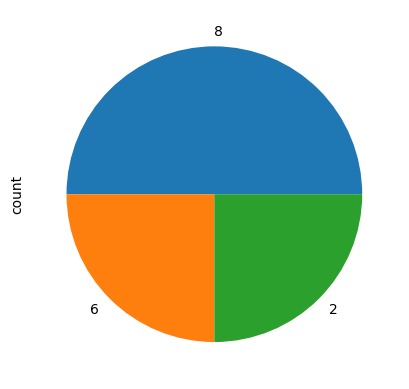

In [30]:
df['class'].value_counts().plot(kind="pie")

In [39]:
df.iloc[2:4, :3]

,name,age,class
2,Medhansh,12,6
3,Idhika,6,2


In [41]:
df.loc[2:, ["name", "marks"]]

,name,marks
2,Medhansh,99
3,Idhika,98


In [58]:
df.query(expr='marks > 90 and age < 10')

,name,age,class,marks,year_of_birth
3,Idhika,6,2,98,NaN


In [62]:
df.sort_values(by=["marks","age"], ascending=[False,True])

,name,age,class,marks,year_of_birth
2,Medhansh,12,6,99,1995.0
3,Idhika,6,2,98,NaN
1,Divya,14,8,98,1993.0
0,Amit,14,8,90,1992.0


In [63]:
df.isnull()

,name,age,class,marks,year_of_birth
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True


In [64]:
df.isna()

,name,age,class,marks,year_of_birth
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True


In [67]:
df.fillna(value=2000)

,name,age,class,marks,year_of_birth
0,Amit,14,8,90,1992.0
1,Divya,14,8,98,1993.0
2,Medhansh,12,6,99,1995.0
3,Idhika,6,2,98,2000.0


In [68]:
df.drop(1)

,name,age,class,marks,year_of_birth
0,Amit,14,8,90,1992.0
2,Medhansh,12,6,99,1995.0
3,Idhika,6,2,98,NaN


In [70]:
df.drop(['marks','class'], axis=1)

,name,age,year_of_birth
0,Amit,14,1992.0
1,Divya,14,1993.0
2,Medhansh,12,1995.0
3,Idhika,6,NaN


In [90]:
df.groupby(['class'])['name'].count()

class
2    1
6    1
8    2
Name: name, dtype: int64

In [92]:
df.rename(columns={'name':'Name', 'class':'Class'})

,Name,age,Class,marks,year_of_birth
0,Amit,14,8,90,1992.0
1,Divya,14,8,98,1993.0
2,Medhansh,12,6,99,1995.0
3,Idhika,6,2,98,NaN
